# Data quality
In this notebook we analyze the data quality refered to COVID19 in Mexico. This information in obtained thought the Secretariat of Health and published by the mexican *Dirección General de Epidemiología*. https://www.gob.mx/salud/documentos/datos-abiertos-152127. 

In [1]:

import glob
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib 
import datetime
from IPython.display import Markdown as md


Using matplotlib backend: MacOSX


## Load data

In [2]:

# load the csv from the src folder
strpath = '../src/'
m = []
i =0
if not os.path.isfile('fulldb1.csv'):
    for filename in glob.glob(strpath+"*"):
        if filename.find('.csv')>0:
            date = '20'+filename[7:9] +'-' + filename[11:13] +'-' +filename[13:15]
            #print(date)
            df = pd.read_csv(filename, encoding = "ISO-8859-1",dtype =str)
            df['FechaRegistro'] = date
            df.FECHA_INGRESO = pd.to_datetime(df['FECHA_INGRESO'],)
            if i== 0:
                df0=df.copy()
                i=1
            else:
                frame = [df0,df]
                df0 = pd.concat(frame)
            del df
else:
    df0 = pd.read_csv('fulldb.csv')
    df0.FechaRegistro = pd.to_datetime(df0['FechaRegistro'], format='%Y-%m-%d')
    lastdateRecord = df0.FechaRegistro.max()
    deltaT = datetime.datetime.now() - lastdateRecord
    for i in range(1,deltaT.days+1) :
        filename = (lastdateRecord + datetime.timedelta(days=1)).strftime("%Y%m%d")+'.csv'
        df = pd.read_csv(strpath+filename, encoding = "ISO-8859-1",dtype =str)
        df['FechaRegistro'] = (lastdateRecord + datetime.timedelta(days=1)).strftime("%Y-%m-%d")
        df.FECHA_INGRESO = pd.to_datetime(df['FECHA_INGRESO'],)

len(df0)

22840271

In [3]:
# we sorted the value by 
# df0 = df0.sort_values(by='FechaRegistro', ascending=False)
df0.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,FechaRegistro
0,2020-06-04,1632b6,2,4,14,2,15,14,120,1,...,2,2,2,99,1,99,MÃ©xico,99,97,2020-06-04
1,2020-06-04,022691,2,4,09,2,09,09,015,2,...,1,2,2,99,1,99,MÃ©xico,99,2,2020-06-04
2,2020-06-04,10413d,2,4,15,1,15,15,091,2,...,2,2,2,99,1,99,MÃ©xico,99,2,2020-06-04
3,2020-06-04,0c15eb,2,4,11,2,15,11,020,1,...,2,2,2,99,1,99,MÃ©xico,99,97,2020-06-04
4,2020-06-04,12944a,2,4,15,2,15,15,060,1,...,2,1,2,99,1,99,MÃ©xico,99,97,2020-06-04


In [4]:
md("We have {0} records of covid evolution cases in Mexico until today {1}".format(df0.shape[0], datetime.datetime.now()) )


We have 22840271 records of covid evolution cases in Mexico until today 2020-07-06 22:20:28.608644

In [5]:
df0.FechaRegistro = pd.to_datetime(df0['FechaRegistro'], format='%Y-%m-%d')

In [6]:
#today = (datetime.datetime.now()).strftime("%Y%m%d")
today = (datetime.datetime.now() - datetime.timedelta(days=1)).strftime("%Y%m%d")
yesterday = (datetime.datetime.now() - datetime.timedelta(days=2)).strftime("%Y%m%d")
ereyesterday = (datetime.datetime.now() - datetime.timedelta(days=3)).strftime("%Y%m%d")
df= pd.read_csv( '../src/'+today       +'.csv', encoding = "ISO-8859-1",dtype =str)
dfA= pd.read_csv('../src/'+yesterday   +'.csv', encoding = "ISO-8859-1",dtype =str)
dfB= pd.read_csv('../src/'+ereyesterday+'.csv', encoding = "ISO-8859-1",dtype =str)

## 1 How many cases we have in the last report vs all reports?

In [7]:
# we get unique cases globaly and from the last csv 
global_ids = df0.ID_REGISTRO.unique().tolist()
last_ids  = df.ID_REGISTRO.unique().tolist()
# we get the cases that are present in previous reports but they doesn't show in the last report
untracket_cases = set(global_ids)- set(last_ids)
tracket_cases = set(global_ids)- set(untracket_cases)

In [8]:
df0.FECHA_SINTOMAS = pd.to_datetime(df0['FECHA_SINTOMAS'], format ='%Y-%m-%d')

In [9]:
# we extract the records that does not live in the last report
df1 = df0[df0.ID_REGISTRO.isin(untracket_cases)]
df1 = df1.copy()

md("we have {0} register that are not tracket".format(df1.ID_REGISTRO.nunique()) )

we have 37114 register that are not tracket

1. How many days the records exist
2. Is there some kind or relation between the records?

In [10]:
# df0.FechaRegistro = pd.to_datetime(df0['FechaRegistro'], format='%Y-%m-%d')
df1.FECHA_SINTOMAS = pd.to_datetime(df1['FECHA_SINTOMAS'], format ='%Y-%m-%d')
df1.FECHA_ACTUALIZACION = pd.to_datetime(df1['FECHA_ACTUALIZACION'], format ='%Y-%m-%d')
df1.FechaRegistro = pd.to_datetime(df1['FechaRegistro'], format ='%Y-%m-%d')


In [11]:
df1['LastDay']  = df1.groupby('ID_REGISTRO')['FechaRegistro'].transform('max')
df1['FirstDay'] = df1.groupby('ID_REGISTRO')['FechaRegistro'].transform('min')
df1['Duration'] = (df1.LastDay - df1.FirstDay).dt.days

In [12]:
df3 = df1.drop_duplicates(keep='first')
df3 = df3.drop_duplicates('ID_REGISTRO',keep='first')
print(len(df1))


280457


In [13]:
df3['Duration']

20        48
107       53
296       44
297       60
597       36
          ..
447503     0
460197     0
464850     0
467078     0
471111     0
Name: Duration, Length: 37114, dtype: int64

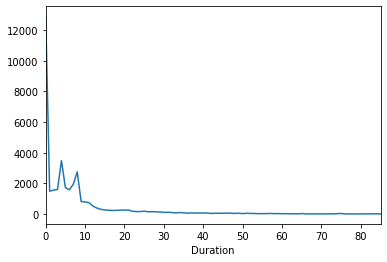

In [14]:
df3.groupby('Duration')['Duration'].count().plot()

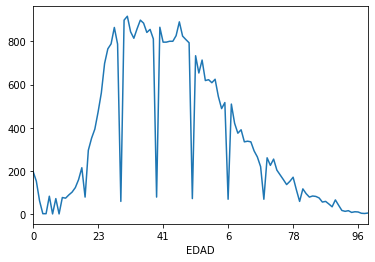

In [15]:
df3.groupby('EDAD')['EDAD'].count().plot()

In [16]:
df3.groupby('EDAD')['EDAD'].count().sort_values(ascending=False).head(10)

EDAD
31    917
30    899
35    899
46    891
36    885
40    866
28    865
34    859
38    856
32    845
Name: EDAD, dtype: int64

In [17]:
df1.FechaRegistro = pd.to_datetime(df1['FechaRegistro'], format='%Y-%m-%d')
df1 = df1.sort_values(by='FechaRegistro', ascending=False)

In [18]:
df1.ID_REGISTRO.nunique()

37114

In [19]:
df1.ID_REGISTRO.nunique()

37114

In [20]:
df1.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,FechaRegistro,LastDay,FirstDay,Duration
623343,2020-07-06,00c5ef,1,12,05,1,15,05,002,1,...,2,3,99,MÃ©xico,99,97,2020-07-06,2020-07-06,2020-07-06,0
627280,2020-07-06,05b2da,2,12,14,1,09,14,098,1,...,1,3,99,MÃ©xico,99,97,2020-07-06,2020-07-06,2020-07-06,0
626759,2020-07-06,08ee44,2,12,11,1,11,11,031,1,...,1,3,99,MÃ©xico,99,97,2020-07-06,2020-07-06,2020-07-06,0
626760,2020-07-06,19cd96,2,12,12,1,12,12,029,1,...,2,3,99,MÃ©xico,99,97,2020-07-06,2020-07-06,2020-07-06,0
626761,2020-07-06,175bbc,2,12,11,2,11,11,026,1,...,1,3,99,MÃ©xico,99,97,2020-07-06,2020-07-06,2020-07-06,0


In [21]:
print(len(df1))
df3 = df1.drop_duplicates(keep='first')
# print(len(df3))
df3 = df3.drop_duplicates('ID_REGISTRO',keep='first')
# print(len(df3))
print(len(df1))

280457
280457


At the end of 2019, the world saw the born of the Sars-cov-2 virus which genereate a disease called COVID19 (COrona VIrus disease). The high risk that we face with this virus is that the sympthons are related to a typical flu but generate a high damage un the lungs decreasing the oxygen level. The disminution of oxygen generate a high demand of intensive beds.

From WHO files

According to the WHO the incubation period for COVID-19, is on average 5-6 days, but can be extended to 14 days. However there some evidence that shows that exist different types of transmition, such as symptomatic, pre-symptomatic and a symptomatic.

The typical transmition is the symptomatic, this ocurrs when a person shown COVID symptomatic and can spread the virus conciently or inconciently respiratory droplest over thier enviroment. However, some cases has shown that a person can transmit COVID-19 without symptoms, (3 or 2 days) before present the typical symptoms. Finally there are some concern about the asyptomatic transmission according to the WHO: Asymptomatic transmission refers to transmission of the virus from a person, who does not develop symptoms. There are few reports of laboratory-confirmed cases who are truly asymptomatic, and to date, there has been no documente asymptomatic transmission. This does not exclude the possibility that it may occur. Asymptomatic cases have been reported as part of contact tracing efforts in some countries. Source https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200402-sitrep-73-covid-19.pdf?sfvrsn=5ae25bc7_2#:~:text=An%20asymptomatic%20laboratory%2Dconfirmed,more%20information%20becomes%20available.


The goal of this notebook is listed below:
* Understand the evolution of the covi19 in Mexico, there are a rate of 10% of deads though a visualization analysis


Key elements

* Incubation period can be expresed a GAMMA.
* Is most common the transmision after show symptoms.
* How we can modeled (explain pre-symtomatic transmition)
* how we can modeled asyntomatic transmition


In [22]:
df3.groupby(['FechaRegistro'])['FechaRegistro'].count().sort_values(ascending=False).head(19)

FechaRegistro
2020-07-06    11323
2020-04-16     2370
2020-04-20     1395
2020-05-19      775
2020-07-02      731
2020-05-21      594
2020-05-12      558
2020-05-07      550
2020-04-30      481
2020-06-10      439
2020-05-08      439
2020-06-03      437
2020-06-26      433
2020-06-02      420
2020-06-22      408
2020-04-17      404
2020-05-13      404
2020-06-30      400
2020-06-16      374
Name: FechaRegistro, dtype: int64

In [23]:
df3.groupby('RESULTADO')['RESULTADO'].count()

RESULTADO
1     2541
2     4432
3    30141
Name: RESULTADO, dtype: int64

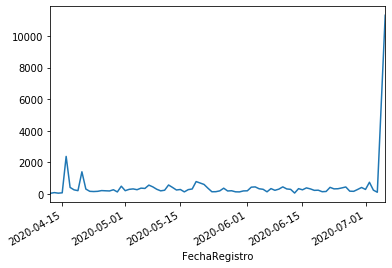

In [24]:
df3.groupby(['FechaRegistro'])['FechaRegistro'].count().plot()

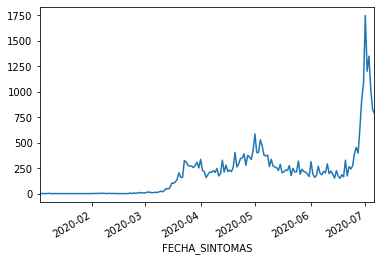

In [25]:
df3.groupby(['FECHA_SINTOMAS'])['FECHA_SINTOMAS'].count().plot()

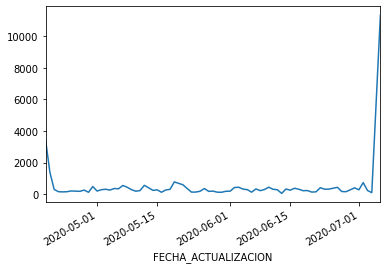

In [26]:
df3.groupby(['FECHA_ACTUALIZACION'])['FECHA_ACTUALIZACION'].count().plot()

In [27]:
df3[df3.FECHA_SINTOMAS<'2020-02-28'].groupby('RESULTADO')['RESULTADO'].count()

RESULTADO
1     4
2    71
3    10
Name: RESULTADO, dtype: int64

# personas que siguen en el sistema

In [28]:
# we extract the records that does not live in the last report
dfO1 = df0[df0.ID_REGISTRO.isin(tracket_cases)]
dfO1 = dfO1.copy()
dfO1.shape


(22559814, 36)

In [29]:
# df0.FechaRegistro = pd.to_datetime(df0['FechaRegistro'], format='%Y-%m-%d')
dfO1.FECHA_SINTOMAS = pd.to_datetime(dfO1['FECHA_SINTOMAS'], format ='%Y-%m-%d')
dfO1.FECHA_ACTUALIZACION = pd.to_datetime(dfO1['FECHA_ACTUALIZACION'], format ='%Y-%m-%d')
dfO1.FechaRegistro = pd.to_datetime(dfO1['FechaRegistro'], format ='%Y-%m-%d')
dfO1['delta_lastRecord'] = (dfO1.FECHA_ACTUALIZACION-dfO1.FechaRegistro ).dt.days
dfO1['deltaReporte'] = (dfO1.FechaRegistro-dfO1.FECHA_SINTOMAS).dt.days
dfO1[dfO1.FECHA_SINTOMAS<'2020-02-29'].groupby('RESULTADO')['RESULTADO'].count()



RESULTADO
1      1545
2    155506
3       336
Name: RESULTADO, dtype: int64

In [30]:
# sort_values(by='FechaRegistro', ascending=False).head()

dfO13 = dfO1.drop_duplicates(['ID_REGISTRO', 
       'FECHA_INGRESO', 'FECHA_SINTOMAS', ],keep='first')
dfO13 = dfO13.copy()

In [31]:
dfO13.groupby('ID_REGISTRO')['FECHA_ACTUALIZACION'].count().sort_values( ascending=False)

ID_REGISTRO
0a2098    4
113be4    4
168506    3
0aa887    3
139532    3
         ..
1452d1    1
1452cc    1
1452c3    1
1452c2    1
000002    1
Name: FECHA_ACTUALIZACION, Length: 641142, dtype: int64

In [32]:
dfO131 = dfO13[dfO13.FECHA_SINTOMAS<'2020-02-29']
dfO131.groupby('ID_REGISTRO')['FECHA_ACTUALIZACION'].count().sort_values( ascending=False).head(10)

ID_REGISTRO
0304ae    2
02a0df    2
0226ad    2
13fb66    2
0632c1    2
1732a3    2
09ab34    1
09a8f7    1
09a8af    1
09a72f    1
Name: FECHA_ACTUALIZACION, dtype: int64

In [33]:
dfO131[dfO131.ID_REGISTRO.isin(['0304ae','02a0df','0226ad','13fb66','0632c1','1732a3',])][['ID_REGISTRO', 
        'FECHA_SINTOMAS','FECHA_INGRESO',]].sort_values(['ID_REGISTRO','FECHA_SINTOMAS'], ascending=False)

,ID_REGISTRO,FECHA_SINTOMAS,FECHA_INGRESO
45837,1732a3,2020-02-06,2020-04-14
55559,1732a3,2020-02-06,2020-04-07
224695,13fb66,2020-01-09,2020-01-09
34894,13fb66,2020-01-02,2020-01-04
118033,0632c1,2020-02-12,2020-02-15
6076,0632c1,2020-02-12,2020-03-15
245193,0304ae,2020-01-28,2020-01-28
27433,0304ae,2020-01-27,2020-01-28
265357,02a0df,2020-02-20,2020-02-21
2333,02a0df,2020-02-20,2020-03-31


In [34]:
dfO131['deltaCorrección'] = (dfO131.FECHA_INGRESO-dfO131.FECHA_SINTOMAS).dt.days

/Users/jorge.urteaga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
dfO131.groupby('ID_REGISTRO')['deltaCorrección'].count().sort_values( ascending=False).head(50)

ID_REGISTRO
0304ae    2
02a0df    2
0226ad    2
13fb66    2
0632c1    2
1732a3    2
09ab34    1
09a8f7    1
09a8af    1
09a72f    1
1e844c    1
099bfc    1
09ab8c    1
098ca1    1
0989cb    1
09870e    1
098532    1
0992c5    1
09b305    1
09ad90    1
097ee0    1
09b30e    1
09bc06    1
09c726    1
09cd5a    1
09e264    1
09e545    1
09eabf    1
09f464    1
09f651    1
09fa2d    1
09fd9f    1
09ffe7    1
098054    1
097a8f    1
0a0f7f    1
093d6c    1
091b0e    1
091e6b    1
092a9c    1
092f75    1
093097    1
093164    1
093400    1
093599    1
09364d    1
093896    1
093931    1
093c64    1
093d26    1
Name: deltaCorrección, dtype: int64

In [36]:
df0['FECHA_SINTOMAS'].min()

Timestamp('2020-01-01 00:00:00')

In [37]:
df0[df0['FECHA_SINTOMAS']=='2020-01-01']

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,FechaRegistro
106885,2020-06-04,0c745e,2,4,09,1,09,09,008,1,...,2,2,2,99,2,99,MÃ©xico,99,97,2020-06-04
109525,2020-06-04,0bc511,2,4,09,2,09,09,002,1,...,2,2,2,99,2,99,MÃ©xico,99,97,2020-06-04
109548,2020-06-04,082032,2,4,14,2,14,14,039,1,...,2,2,2,99,2,99,MÃ©xico,99,97,2020-06-04
110590,2020-06-04,031621,2,4,09,2,09,09,002,2,...,2,2,2,99,2,99,MÃ©xico,99,2,2020-06-04
111805,2020-06-04,073494,2,4,23,2,07,23,005,1,...,2,2,2,99,2,99,MÃ©xico,99,97,2020-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377920,2020-06-21,044d0d,2,4,09,1,09,09,015,1,...,2,2,2,99,2,99,MÃ©xico,99,97,2020-06-21
381950,2020-06-21,1dc68d,2,4,14,1,14,14,101,2,...,2,2,2,99,2,99,MÃ©xico,99,2,2020-06-21
397140,2020-06-21,033221,2,12,05,1,28,05,030,1,...,2,2,2,1,2,99,MÃ©xico,99,97,2020-06-21
405742,2020-06-21,0bdf57,2,4,09,1,09,15,104,1,...,2,2,2,99,2,99,MÃ©xico,99,97,2020-06-21


In [38]:
first= pd.read_csv( '../src/'+'20200412'       +'.csv', encoding = "ISO-8859-1",dtype =str)


In [39]:
first.FECHA_SINTOMAS = pd.to_datetime(first['FECHA_SINTOMAS'], format ='%Y-%m-%d')

In [40]:
first.FECHA_SINTOMAS.min()

Timestamp('2020-01-01 00:00:00')